In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import qgrid
np.set_printoptions(precision=2, suppress=True)

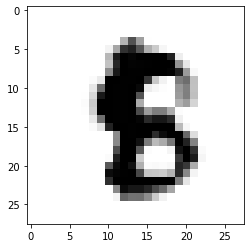

In [67]:
data = np.loadtxt('data/udemy/01.mnist_8.txt', delimiter = ',')
data.shape
data = np.reshape(data[1],(28,28))
plt.imshow(data, cmap = 'Greys')
plt.show;

# Фреймы данных

In [45]:
df = pd.read_csv('data/udemy/internet-2017.csv', 
                  sep = ';', 
                  names = ['ID','Region','Cnt'], 
                  na_values = 'NA',
                  #converters = {'Region': str, 'Cnt': float}
                 )
df.fillna(0, axis = 1, inplace = True)
df = df[1:]
df

,ID,Region,Cnt
1,0,Российская Федерация,14.44
2,1,БЕЛГОРОДСКАЯ ОБЛ.,9.83
3,2,БРЯНСКАЯ ОБЛ.,12.46
4,3,ВЛАДИМИРСКАЯ ОБЛ.,12.38
5,4,ВОРОНЕЖСКАЯ ОБЛ.,16.19
...,...,...,...
88,87,САХАЛИНСКАЯ ОБЛ.,13.01
89,88,ЕВРЕЙСКАЯ А.О.,13.29
90,89,ЧУКОТСКИЙ А.О.,9.48
91,90,Дальневосточный фед.округ,13.03


In [48]:
# теперь мы можем преобразовать типы
df['Cnt'] = df.Cnt.astype('float')
df['Region'] = df.Region.astype('str')

In [49]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 1 to 92
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      92 non-null     object 
 1   Region  92 non-null     object 
 2   Cnt     92 non-null     float64
dtypes: float64(1), object(2)
memory usage: 16.4 KB


In [52]:
qgrid_widjet = qgrid.show_grid(df, show_toolbar = True)
qgrid_widjet

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [51]:
data_array = df.values
data_array

array([['0', 'Российская Федерация', 14.44],
       ['1', 'БЕЛГОРОДСКАЯ ОБЛ.', 9.83],
       ['2', 'БРЯНСКАЯ ОБЛ.', 12.46],
       ['3', 'ВЛАДИМИРСКАЯ ОБЛ.', 12.38],
       ['4', 'ВОРОНЕЖСКАЯ  ОБЛ.', 16.19],
       ['5', 'ИВАНОВСКАЯ ОБЛ.', 10.5],
       ['6', 'КАЛУЖСКАЯ ОБЛ.', 15.92],
       ['7', 'КОСТРОМСКАЯ ОБЛ.', 16.38],
       ['8', 'КУРСКАЯ ОБЛ.', 10.48],
       ['9', 'ЛИПЕЦКАЯ ОБЛ.', 12.09],
       ['10', 'МОСКОВСКАЯ ОБЛ.', 7.92],
       ['11', 'ОРЛОВСКАЯ ОБЛ.', 11.76],
       ['12', 'РЯЗАНСКАЯ ОБЛ.', 10.58],
       ['13', 'СМОЛЕНСКАЯ ОБЛ.', 13.48],
       ['14', 'ТАМБОВСКАЯ ОБЛ.', 12.36],
       ['15', 'ТВЕРСКАЯ ОБЛ.', 10.45],
       ['16', 'ТУЛЬСКАЯ ОБЛ.', 15.86],
       ['17', 'ЯРОСЛАВСКАЯ ОБЛ.', 18.48],
       ['18', 'г.МОСКВА', 24.59],
       ['19', 'Центральный фед.округ', 15.76],
       ['20', 'РЕСП. КАРЕЛИЯ', 23.88],
       ['21', 'РЕСП. КОМИ', 16.5],
       ['22', 'АРХАНГЕЛЬСКАЯ ОБЛ.', 15.57],
       ['23', 'ВОЛОГОДСКАЯ ОБЛ.', 16.18],
       ['24', 'КАЛИНИНГРАДСКАЯ ОБЛ.

In [46]:
# Зарузка данных из excel
df_exel = pd.ExcelFile('https://video.ittensive.com/python-advanced/website.load.timings.xlsx')
df_exel.sheet_names

['Лист1']

In [70]:
df_exel.parse(sheet = 0).info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Дата                  51 non-null     datetime64[ns]
 1   Время отрисовки (мс)  51 non-null     int64         
 2   Время загрузки (мс)   51 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.3 KB


In [48]:
# переименовываем колонки
# конвертируем типы
df_exel1 = df_exel.parse(sheet = 0, 
                         names = ['Date', 'DOM_time', 'Load_time'],
                         converters = {'Date': pd.to_datetime, 'DOM_time': int, 'Load_time': int}
                        )
df_exel1

,Date,DOM_time,Load_time
0,2016-03-12 00:00:01,3160,7008
1,2016-03-13 00:00:01,0,0
2,2016-03-14 00:00:01,4861,45341
3,2016-03-15 00:00:01,7234,26965
4,2016-03-16 00:00:01,2135,8746
5,2016-03-17 00:00:01,3147,12658
6,2016-03-18 00:00:01,4361,15742
7,2016-03-19 00:00:01,2244,8524
8,2016-03-20 00:00:01,2643,9471
9,2016-03-21 00:00:01,3433,10410


In [56]:
df_exel1.mean()

<ipython-input-56-16be8913edcf>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_exel1.mean()


DOM_time      4026.705882
Load_time    11352.862745
dtype: float64

In [64]:
df

,ID,Region,Cnt
1,0.0,Российская Федерация,"14,44"
2,1.0,БЕЛГОРОДСКАЯ ОБЛ.,"9,83"
3,2.0,БРЯНСКАЯ ОБЛ.,"12,46"
4,3.0,ВЛАДИМИРСКАЯ ОБЛ.,"12,38"
5,4.0,ВОРОНЕЖСКАЯ ОБЛ.,"16,19"
...,...,...,...
88,87.0,САХАЛИНСКАЯ ОБЛ.,"13,01"
89,88.0,ЕВРЕЙСКАЯ А.О.,"13,29"
90,89.0,ЧУКОТСКИЙ А.О.,"9,48"
91,90.0,Дальневосточный фед.округ,"13,03"


# Индексы данных

In [63]:
df = pd.read_csv('data/udemy/internet_2017.csv', sep = ',', names = ['Region','Qnty'], decimal = ',', na_values = 'NA', skiprows = 1)
df_indexed = pd.Series(df['Qnty'].values, index = df['Region'].values)
df.index.name = 'Регион'
df

,Region,Qnty
Регион,,
0,Российская Федерация,14.44
1,БЕЛГОРОДСКАЯ ОБЛ.,9.83
2,БРЯНСКАЯ ОБЛ.,12.46
3,ВЛАДИМИРСКАЯ ОБЛ.,12.38
4,ВОРОНЕЖСКАЯ ОБЛ.,16.19
...,...,...
87,САХАЛИНСКАЯ ОБЛ.,13.01
88,ЕВРЕЙСКАЯ А.О.,13.29
89,ЧУКОТСКИЙ А.О.,9.48


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  92 non-null     object 
 1   Qnty    91 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


## Иерархический (множественный) индекс

In [5]:
df = pd.read_csv('data/udemy/internet_2017.csv',na_values  = 'NA', decimal =',',names = ['Region','Qnty'], skiprows = 1)
# построим фильтр, который в поле Region ищет слово округ
area_index = df[df['Region'].str.contains('округ')].index 
area_index

Int64Index([19, 30, 37, 45, 60, 67, 80, 90], dtype='int64')

In [7]:
# разберем работу лябда-функции на примере создания списка индексов
#1. создаём генератор
#2. данные определяет лямбда-функция
data_areas_index = [(lambda n:'area' if n in area_index else'region')(i) for i in range( 0,len(df.index) )]
df ['Type'] = data_areas_index # создаём новый столбец
df = df.set_index(['Type', 'Region']) # создаём составной индекс
df

Qnty
Type   Region                          
region Российская Федерация       14.44
       БЕЛГОРОДСКАЯ ОБЛ.           9.83
       БРЯНСКАЯ ОБЛ.              12.46
       ВЛАДИМИРСКАЯ ОБЛ.          12.38
       ВОРОНЕЖСКАЯ  ОБЛ.          16.19
...                                 ...
       САХАЛИНСКАЯ ОБЛ.           13.01
       ЕВРЕЙСКАЯ А.О.             13.29
       ЧУКОТСКИЙ А.О.              9.48
area   Дальневосточный фед.округ  13.03
region РЕСПУБЛИКА КРЫМ              NaN

[92 rows x 1 columns]

In [10]:
df = df.sort_index()
df

Qnty
Type   Region                            
area   Дальневосточный фед.округ    13.03
       Приволжский фед.округ        16.12
       Северо-Западный фед.округ    17.52
       Северо-Кавказский фед.округ   4.33
       Сибирский фед.округ          13.35
...                                   ...
region ЧУКОТСКИЙ А.О.                9.48
       ЯМАЛО-НЕНЕЦКИЙ АО            15.33
       ЯРОСЛАВСКАЯ ОБЛ.             18.48
       г.МОСКВА                     24.59
       г.САНКТ-ПЕТЕРБУРГ            21.94

[92 rows x 1 columns]

In [11]:
qgrid_widjet = qgrid.show_grid(df, show_toolbar = True)
qgrid_widjet

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [12]:
# срезы данных с помощью метода loc
areas = df.loc['area']
areas

,Qnty
Region,
Дальневосточный фед.округ,13.03
Приволжский фед.округ,16.12
Северо-Западный фед.округ,17.52
Северо-Кавказский фед.округ,4.33
Сибирский фед.округ,13.35
Уральский фед.округ,16.89
Центральный фед.округ,15.76
Южный фед.округ,11.10


## Использование индексов для объединения данных

In [26]:
df_2017 = pd.read_csv('data/udemy/internet_2017.csv',na_values  = 'NA', decimal =',',names = ['Region','2017'], skiprows = 1, index_col = 'Region')
df_2018 = pd.read_csv('data/udemy/internet_2018.csv',na_values  = 'NA', decimal =',',names = ['Region','2018'], skiprows = 1, index_col = 'Region')

In [27]:
df_2017

,2017
Region,
Российская Федерация,14.44
БЕЛГОРОДСКАЯ ОБЛ.,9.83
БРЯНСКАЯ ОБЛ.,12.46
ВЛАДИМИРСКАЯ ОБЛ.,12.38
ВОРОНЕЖСКАЯ ОБЛ.,16.19
...,...
САХАЛИНСКАЯ ОБЛ.,13.01
ЕВРЕЙСКАЯ А.О.,13.29
ЧУКОТСКИЙ А.О.,9.48


In [28]:
df_2018

,2018
Region,
Российская Федерация,16.53
БЕЛГОРОДСКАЯ ОБЛ.,11.35
БРЯНСКАЯ ОБЛ.,12.72
ВЛАДИМИРСКАЯ ОБЛ.,15.24
ВОРОНЕЖСКАЯ ОБЛ.,17.45
...,...
САХАЛИНСКАЯ ОБЛ.,12.69
ЕВРЕЙСКАЯ А.О.,12.72
ЧУКОТСКИЙ А.О.,18.05


In [29]:
df_merge = pd.merge(df_2017, df_2018, left_index = True, right_index = True)
df_merge.fillna(0, axis = 1, inplace = True)
df_merge

,2017,2018
Region,,
Российская Федерация,14.44,16.53
БЕЛГОРОДСКАЯ ОБЛ.,9.83,11.35
БРЯНСКАЯ ОБЛ.,12.46,12.72
ВЛАДИМИРСКАЯ ОБЛ.,12.38,15.24
ВОРОНЕЖСКАЯ ОБЛ.,16.19,17.45
...,...,...
САХАЛИНСКАЯ ОБЛ.,13.01,12.69
ЕВРЕЙСКАЯ А.О.,13.29,12.72
ЧУКОТСКИЙ А.О.,9.48,18.05


In [30]:
qgrid_widjet = qgrid.show_grid(df_merge, show_toolbar = True)
qgrid_widjet

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [31]:
df_merge.mean()

2017    12.647065
2018    14.087500
dtype: float64

In [48]:
#Вывод статистических сведений о датафрейме
# Знание статистических сведений о датафрейме весьма полезно в ситуациях, когда он содержит множество числовых значений. Например, знание среднего, минимального и максимального значений столбца rating даёт нам некоторое понимание того, как, в целом, выглядит датафрейм. Вот соответствующая команда:

df_merge.describe() # описательная статистика


,2017,2018
count,92.000000,92.000000
mean,12.647065,14.087500
std,5.343800,5.941666
min,0.000000,0.000000
25%,9.760000,11.417500
50%,13.020000,14.700000
75%,16.182500,17.707500
max,25.940000,31.350000


<AxesSubplot:>

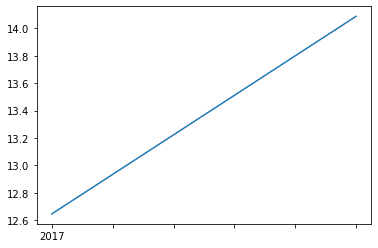

In [33]:
%matplotlib inline
df_merge.mean().plot.line()
#plt.show()

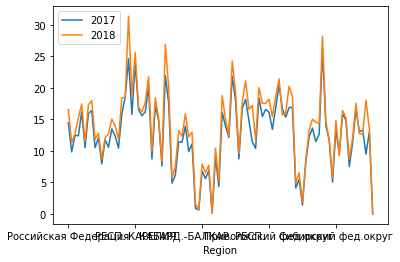

In [34]:
%matplotlib inline
df_merge.plot.line()
plt.show()

# Фильтрация данных

In [50]:
df_2017[df_2017['2017']>22 ]

,2017
Region,
г.МОСКВА,24.59
РЕСП. КАРЕЛИЯ,23.88
НОВОСИБИРСКАЯ ОБЛ.,25.94


In [47]:
print(df_2017 < 20)

                            2017
Region                          
Российская Федерация        True
БЕЛГОРОДСКАЯ ОБЛ.           True
БРЯНСКАЯ ОБЛ.               True
ВЛАДИМИРСКАЯ ОБЛ.           True
ВОРОНЕЖСКАЯ  ОБЛ.           True
...                          ...
САХАЛИНСКАЯ ОБЛ.            True
ЕВРЕЙСКАЯ А.О.              True
ЧУКОТСКИЙ А.О.              True
Дальневосточный фед.округ   True
РЕСПУБЛИКА КРЫМ            False

[92 rows x 1 columns]


In [73]:
# сложная фильтрация использует скобки для соблюдения приоритетов оперций сравнения
df1 = df_2017[ ( df_2017['2017']>15 ) & ( df_2017['2017']<20 )]
df1.info()
df2 = df1[df1.index.str.contains('ОБЛ')]
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, ВОРОНЕЖСКАЯ  ОБЛ. to МАГАДАНСКАЯ ОБЛ.
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2017    26 non-null     float64
dtypes: float64(1)
memory usage: 416.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, ВОРОНЕЖСКАЯ  ОБЛ. to МАГАДАНСКАЯ ОБЛ.
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2017    16 non-null     float64
dtypes: float64(1)
memory usage: 256.0+ bytes


,2017
Region,
ВОРОНЕЖСКАЯ ОБЛ.,16.19
КАЛУЖСКАЯ ОБЛ.,15.92
КОСТРОМСКАЯ ОБЛ.,16.38
ТУЛЬСКАЯ ОБЛ.,15.86
ЯРОСЛАВСКАЯ ОБЛ.,18.48
АРХАНГЕЛЬСКАЯ ОБЛ.,15.57
ВОЛОГОДСКАЯ ОБЛ.,16.18
МУРМАНСКАЯ ОБЛ.,17.15
КИРОВСКАЯ ОБЛ.,16.73


In [74]:
df_2017

,2017
Region,
Российская Федерация,14.44
БЕЛГОРОДСКАЯ ОБЛ.,9.83
БРЯНСКАЯ ОБЛ.,12.46
ВЛАДИМИРСКАЯ ОБЛ.,12.38
ВОРОНЕЖСКАЯ ОБЛ.,16.19
...,...
САХАЛИНСКАЯ ОБЛ.,13.01
ЕВРЕЙСКАЯ А.О.,13.29
ЧУКОТСКИЙ А.О.,9.48


In [79]:
df2017_notnull = df_2017.loc[df_2017.any(axis = 1)]
df2017_notnull

,2017
Region,
Российская Федерация,14.44
БЕЛГОРОДСКАЯ ОБЛ.,9.83
БРЯНСКАЯ ОБЛ.,12.46
ВЛАДИМИРСКАЯ ОБЛ.,12.38
ВОРОНЕЖСКАЯ ОБЛ.,16.19
...,...
МАГАДАНСКАЯ ОБЛ.,16.65
САХАЛИНСКАЯ ОБЛ.,13.01
ЕВРЕЙСКАЯ А.О.,13.29


In [80]:
df2017_null = df_2017.loc[~df_2017.any(axis = 1)]
df2017_null

,2017
Region,
РЕСПУБЛИКА КРЫМ,NaN


In [82]:
df2017_filled = df_2017.loc[:, df_2017.all()]
df2017_filled

,2017
Region,
Российская Федерация,14.44
БЕЛГОРОДСКАЯ ОБЛ.,9.83
БРЯНСКАЯ ОБЛ.,12.46
ВЛАДИМИРСКАЯ ОБЛ.,12.38
ВОРОНЕЖСКАЯ ОБЛ.,16.19
...,...
САХАЛИНСКАЯ ОБЛ.,13.01
ЕВРЕЙСКАЯ А.О.,13.29
ЧУКОТСКИЙ А.О.,9.48


In [83]:
# удалить строки с NA
df_nonull = df_2017.dropna()
df_nonull

,2017
Region,
Российская Федерация,14.44
БЕЛГОРОДСКАЯ ОБЛ.,9.83
БРЯНСКАЯ ОБЛ.,12.46
ВЛАДИМИРСКАЯ ОБЛ.,12.38
ВОРОНЕЖСКАЯ ОБЛ.,16.19
...,...
МАГАДАНСКАЯ ОБЛ.,16.65
САХАЛИНСКАЯ ОБЛ.,13.01
ЕВРЕЙСКАЯ А.О.,13.29


## Изменение ДатаФреймов

In [104]:
df2018 = pd.read_csv('data/udemy/internet-2018.csv', sep =',', na_values = 'NA', names = ['Region','int','frac'], skiprows = 1, index_col = 'Region' )
df2018

,int,frac
Region,,
Российская Федерация,16.0,53.0
БЕЛГОРОДСКАЯ ОБЛ.,11.0,35.0
БРЯНСКАЯ ОБЛ.,12.0,72.0
ВЛАДИМИРСКАЯ ОБЛ.,15.0,24.0
ВОРОНЕЖСКАЯ ОБЛ.,17.0,45.0
...,...,...
САХАЛИНСКАЯ ОБЛ.,12.0,69.0
ЕВРЕЙСКАЯ А.О.,12.0,72.0
ЧУКОТСКИЙ А.О.,18.0,5.0


In [105]:
df2018['frac'] = df2018['frac'].apply(lambda n: n/100)
df2018

,int,frac
Region,,
Российская Федерация,16.0,0.53
БЕЛГОРОДСКАЯ ОБЛ.,11.0,0.35
БРЯНСКАЯ ОБЛ.,12.0,0.72
ВЛАДИМИРСКАЯ ОБЛ.,15.0,0.24
ВОРОНЕЖСКАЯ ОБЛ.,17.0,0.45
...,...,...
САХАЛИНСКАЯ ОБЛ.,12.0,0.69
ЕВРЕЙСКАЯ А.О.,12.0,0.72
ЧУКОТСКИЙ А.О.,18.0,0.05


In [106]:
df2018['2018']=df2018['int']+df2018['frac']
#удаляем лишние столбцы
df2018 = df2018.drop(labels = ['int', 'frac'], axis = 1)
df2018

,2018
Region,
Российская Федерация,16.53
БЕЛГОРОДСКАЯ ОБЛ.,11.35
БРЯНСКАЯ ОБЛ.,12.72
ВЛАДИМИРСКАЯ ОБЛ.,15.24
ВОРОНЕЖСКАЯ ОБЛ.,17.45
...,...
САХАЛИНСКАЯ ОБЛ.,12.69
ЕВРЕЙСКАЯ А.О.,12.72
ЧУКОТСКИЙ А.О.,18.05


In [107]:
# собираем новый датафрейм из существующего
df2018 = df2018.reset_index()
df2018_1 = pd.DataFrame({'Регион' : df2018['Region'], '2018': df2018['2018']})
df2018_1.set_index('Регион')
df2018_1

,Регион,2018
0,Российская Федерация,16.53
1,БЕЛГОРОДСКАЯ ОБЛ.,11.35
2,БРЯНСКАЯ ОБЛ.,12.72
3,ВЛАДИМИРСКАЯ ОБЛ.,15.24
4,ВОРОНЕЖСКАЯ ОБЛ.,17.45
...,...,...
87,САХАЛИНСКАЯ ОБЛ.,12.69
88,ЕВРЕЙСКАЯ А.О.,12.72
89,ЧУКОТСКИЙ А.О.,18.05
90,Дальневосточный фед.округ,13.47


In [108]:
df2018

,Region,2018
0,Российская Федерация,16.53
1,БЕЛГОРОДСКАЯ ОБЛ.,11.35
2,БРЯНСКАЯ ОБЛ.,12.72
3,ВЛАДИМИРСКАЯ ОБЛ.,15.24
4,ВОРОНЕЖСКАЯ ОБЛ.,17.45
...,...,...
87,САХАЛИНСКАЯ ОБЛ.,12.69
88,ЕВРЕЙСКАЯ А.О.,12.72
89,ЧУКОТСКИЙ А.О.,18.05
90,Дальневосточный фед.округ,13.47


In [109]:
df2018[df2018['2018'].isnull()].fillna(0, axis = 1)


,Region,2018
91,РЕСПУБЛИКА КРЫМ,0.0


In [110]:
df2018

,Region,2018
0,Российская Федерация,16.53
1,БЕЛГОРОДСКАЯ ОБЛ.,11.35
2,БРЯНСКАЯ ОБЛ.,12.72
3,ВЛАДИМИРСКАЯ ОБЛ.,15.24
4,ВОРОНЕЖСКАЯ ОБЛ.,17.45
...,...,...
87,САХАЛИНСКАЯ ОБЛ.,12.69
88,ЕВРЕЙСКАЯ А.О.,12.72
89,ЧУКОТСКИЙ А.О.,18.05
90,Дальневосточный фед.округ,13.47


In [111]:
df2018_null = df2018[df2018['2018'].isnull()].fillna(0)
df2018_null

,Region,2018
91,РЕСПУБЛИКА КРЫМ,0.0


In [112]:
df2018_less5 = df2018[df2018['2018'] < 5]
df2018_less5

,Region,2018
38,РЕСП. ДАГЕСТАН,1.61
39,РЕСП.ИНГУШСКАЯ,0.61
43,ЧЕЧЕНСКАЯ РЕСП.,0.11
68,РЕСП. АЛТАЙ,4.92
70,РЕСП. ТЫВА,1.78


In [113]:
df2018_null_less5 = df2018_null.append(df2018_less5)
df2018_null_less5

,Region,2018
91,РЕСПУБЛИКА КРЫМ,0.00
38,РЕСП. ДАГЕСТАН,1.61
39,РЕСП.ИНГУШСКАЯ,0.61
43,ЧЕЧЕНСКАЯ РЕСП.,0.11
68,РЕСП. АЛТАЙ,4.92
70,РЕСП. ТЫВА,1.78


## Лямбда-функции в pandas

In [119]:
sum_2 = lambda x=0, y=0: x+y
sum_2()

0

In [150]:
df = pd.read_csv('data/udemy/internet_2018.csv', na_values='NA', skiprows = 1, decimal = ',', names = ['region','2017'])
df.fillna(0, axis = 1, inplace = True)
df

,region,2017
0,Российская Федерация,16.53
1,БЕЛГОРОДСКАЯ ОБЛ.,11.35
2,БРЯНСКАЯ ОБЛ.,12.72
3,ВЛАДИМИРСКАЯ ОБЛ.,15.24
4,ВОРОНЕЖСКАЯ ОБЛ.,17.45
...,...,...
87,САХАЛИНСКАЯ ОБЛ.,12.69
88,ЕВРЕЙСКАЯ А.О.,12.72
89,ЧУКОТСКИЙ А.О.,18.05
90,Дальневосточный фед.округ,13.47


In [123]:
df['2017'] = df['2017'].apply(lambda x: int(x//10))
df

,2017
region,
Российская Федерация,1
БЕЛГОРОДСКАЯ ОБЛ.,1
БРЯНСКАЯ ОБЛ.,1
ВЛАДИМИРСКАЯ ОБЛ.,1
ВОРОНЕЖСКАЯ ОБЛ.,1
...,...
САХАЛИНСКАЯ ОБЛ.,1
ЕВРЕЙСКАЯ А.О.,1
ЧУКОТСКИЙ А.О.,1


In [151]:
def findMoscow (x):
    if x[0].find('ОБЛ') > -1:
        return [x[0], x[1]*-1]
    else:
        return x
df = df.apply(findMoscow, axis = 1, result_type = 'expand')
df

,region,2017
0,Российская Федерация,16.53
1,БЕЛГОРОДСКАЯ ОБЛ.,-11.35
2,БРЯНСКАЯ ОБЛ.,-12.72
3,ВЛАДИМИРСКАЯ ОБЛ.,-15.24
4,ВОРОНЕЖСКАЯ ОБЛ.,-17.45
...,...,...
87,САХАЛИНСКАЯ ОБЛ.,-12.69
88,ЕВРЕЙСКАЯ А.О.,12.72
89,ЧУКОТСКИЙ А.О.,18.05
90,Дальневосточный фед.округ,13.47


## Группировка данных

In [8]:
df = pd.read_csv('data/udemy/data-5283-2019-10-04.utf.csv', sep = ';')
df

,ID,AdmArea,Year,global_id,Month,Calls,Unnamed: 6
0,1,Центральный административный округ,2015,37153160,Январь,408,NaN
1,2,Северный административный округ,2015,37153161,Январь,408,NaN
2,3,Северо-Восточный административный округ,2015,37153162,Январь,445,NaN
3,4,Восточный административный округ,2015,37153163,Январь,619,NaN
4,5,Юго-Восточный административный округ,2015,37153164,Январь,541,NaN
...,...,...,...,...,...,...,...
622,623,Восточный административный округ,2019,1011449880,Сентябрь,782,NaN
623,624,Южный административный округ,2019,1011449881,Сентябрь,900,NaN
624,625,Северный административный округ,2019,1011465183,Сентябрь,644,NaN
625,626,Зеленоградский административный округ,2019,1011465249,Сентябрь,197,NaN


In [9]:
df_group = df.groupby('AdmArea')
df_group

In [10]:
df_avg = df_group.mean()
df_avg

,ID,Year,global_id,Calls,Unnamed: 6
AdmArea,,,,,
Восточный административный округ,315.053571,2016.892857,4.974778e+08,655.553571,NaN
Восточный административный округ,282.000000,2017.000000,3.235288e+08,647.000000,NaN
Западный административный округ,311.963636,2016.872727,4.904078e+08,556.127273,NaN
Западный административный округ,281.000000,2017.000000,3.235288e+08,546.000000,NaN
Запдный административный округ,479.000000,2018.000000,8.863044e+08,644.000000,NaN
Зеленоградский административный округ,318.589286,2016.892857,4.974794e+08,154.803571,NaN
Зеленоградский административный округ,285.000000,2017.000000,3.235288e+08,161.000000,NaN
Северно-Западный административный округ,157.000000,2016.000000,1.676152e+08,392.000000,NaN
Северный административный округ,316.339286,2016.892857,4.974790e+08,469.589286,NaN


In [11]:
df_group.mean()['Calls']

AdmArea
Восточный административный округ                      655.553571
Восточный административный округ                      647.000000
Западный административный округ                       556.127273
Западный административный округ                       546.000000
Запдный административный округ                        644.000000
Зеленоградский административный округ                 154.803571
Зеленоградский административный округ                 161.000000
Северно-Западный административный округ               392.000000
Северный административный округ                       469.589286
Северный административный округ                       435.000000
Северо-Востосный административный округ               608.000000
Северо-Восточный административный округ               602.890909
Северо-Восточный административный округ               460.000000
Северо-Закпадный административный округ               415.000000
Северо-Западный административный округ                421.132075
Северо-Западный а

In [13]:
df_group.max()['Calls']

AdmArea
Восточный административный округ                       921
Восточный административный округ                       647
Западный административный округ                        871
Западный административный округ                        546
Запдный административный округ                         644
Зеленоградский административный округ                  280
Зеленоградский административный округ                  161
Северно-Западный административный округ                392
Северный административный округ                        745
Северный административный округ                        435
Северо-Востосный административный округ                608
Северо-Восточный административный округ               1225
Северо-Восточный административный округ                460
Северо-Закпадный административный округ                415
Северо-Западный административный округ                 674
Северо-Западный административный округ                 332
Северо-Заподный административный округ          

In [12]:
df_group.count()['Calls']

AdmArea
Восточный административный округ                      56
Восточный административный округ                       1
Западный административный округ                       55
Западный административный округ                        1
Запдный административный округ                         1
Зеленоградский административный округ                 56
Зеленоградский административный округ                  1
Северно-Западный административный округ                1
Северный административный округ                       56
Северный административный округ                        1
Северо-Востосный административный округ                1
Северо-Восточный административный округ               55
Северо-Восточный административный округ                1
Северо-Закпадный административный округ                1
Северо-Западный административный округ                53
Северо-Западный административный округ                 1
Северо-Заподный административный округ                 1
Троицкий и Новомосковск

In [ ]:
# Приведение серии данных к категории
df['AdmArea'] = df['AdmArea'].astype('category')

## Очистка и фильтрация данных

In [27]:

df = pd.read_csv('data/udemy/data-5283-2019-10-04.utf.csv', delimiter = ';')
df

,ID,AdmArea,Year,global_id,Month,Calls,Unnamed: 6
0,1,Центральный административный округ,2015,37153160,Январь,408,NaN
1,2,Северный административный округ,2015,37153161,Январь,408,NaN
2,3,Северо-Восточный административный округ,2015,37153162,Январь,445,NaN
3,4,Восточный административный округ,2015,37153163,Январь,619,NaN
4,5,Юго-Восточный административный округ,2015,37153164,Январь,541,NaN
...,...,...,...,...,...,...,...
622,623,Восточный административный округ,2019,1011449880,Сентябрь,782,NaN
623,624,Южный административный округ,2019,1011449881,Сентябрь,900,NaN
624,625,Северный административный округ,2019,1011465183,Сентябрь,644,NaN
625,626,Зеленоградский административный округ,2019,1011465249,Сентябрь,197,NaN


In [31]:
df['Month'] = df['Month'].str.upper().str.slice(0,3).astype('category')
df_group = df.groupby('Month').sum()
df_group = df_group.sort_values('Calls', ascending = True)
df_group

,ID,Year,global_id,Calls,Unnamed: 6
Month,,,,,
НОЯ,13816,88726,21306522182,20087,0.0
ОКТ,13332,88726,20620397858,21171,0.0
ДЕК,14300,88726,22907111288,21661,0.0
ФЕВ,15455,110935,24109967247,23755,0.0
ИЮЛ,18480,110935,29089430920,25004,0.0
ЯНВ,14850,110935,23486173877,25060,0.0
АВГ,19085,110935,31257576781,26443,0.0
СЕН,19690,110935,31418567518,27379,0.0
ИЮН,17875,110935,27391006251,27437,0.0


<AxesSubplot:xlabel='AdmArea'>

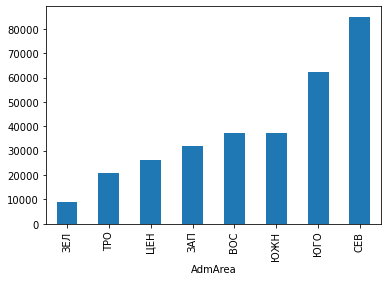

In [60]:
%matplotlib inline
df['AdmArea'] = df['AdmArea'].str.upper().str.slice(0,3).astype('category')
df_group1 = df.groupby('AdmArea').sum()
df_group1 = df_group1.sort_values('Calls', ascending = True)
df_group1['Calls'].plot.bar()

<AxesSubplot:xlabel='Month'>

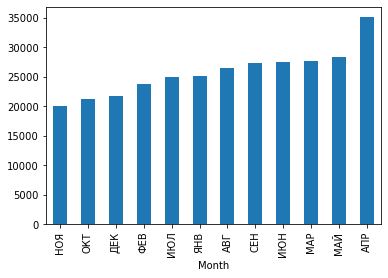

In [61]:
%matplotlib inline
df_group['Calls'].plot.bar()

In [62]:
df = pd.read_csv('data/udemy/data-5283-2019-10-04.utf.csv', delimiter = ';')
df.groupby('Month')['Calls'].count()

Month
Август      44
Апрель      55
Декабрь     44
Июль        55
Июнь        55
Май         55
Март        55
Ноябрь      44
Октябрь     44
Сентябрь    43
Сентября     1
Февраль     54
Январь      55
август      11
сентябрь    11
февраль      1
Name: Calls, dtype: int64

In [63]:
df = pd.read_csv('data/udemy/data-5283-2019-10-04.utf.csv', delimiter = ';')
#df['Mnth'] = df['Month'].str.upper().str.slice(0,3)
df

,ID,AdmArea,Year,global_id,Month,Calls,Unnamed: 6
0,1,Центральный административный округ,2015,37153160,Январь,408,NaN
1,2,Северный административный округ,2015,37153161,Январь,408,NaN
2,3,Северо-Восточный административный округ,2015,37153162,Январь,445,NaN
3,4,Восточный административный округ,2015,37153163,Январь,619,NaN
4,5,Юго-Восточный административный округ,2015,37153164,Январь,541,NaN
...,...,...,...,...,...,...,...
622,623,Восточный административный округ,2019,1011449880,Сентябрь,782,NaN
623,624,Южный административный округ,2019,1011449881,Сентябрь,900,NaN
624,625,Северный административный округ,2019,1011465183,Сентябрь,644,NaN
625,626,Зеленоградский административный округ,2019,1011465249,Сентябрь,197,NaN


In [64]:
# лямбда-фильтр лишних значений

#df['Month'] = df['Month'].astype('category')
df1 = df.groupby('Month').filter(lambda x: x['Calls'].count() == 1)
df1_group = df1.groupby('Month').mean()
df1_group

,ID,Year,global_id,Calls,Unnamed: 6
Month,,,,,
Сентября,495,2018,889769759,477,NaN
февраль,411,2018,854001957,580,NaN


## Линейная регрессия

In [71]:
from sklearn.linear_model import LinearRegression as LR

In [97]:
df = pd.read_csv('data/udemy/data-5283-2019-10-04.csv', delimiter = ';')
df_avg = df.groupby('Year').mean()
df_avg

,ID,global_id,Calls,Unnamed: 6
Year,,,,
2015,66.5,4.112174e+07,427.068182,NaN
2016,198.5,1.976907e+08,422.878788,NaN
2017,330.5,5.279323e+08,458.454545,NaN
2018,462.5,8.761135e+08,599.068182,NaN
2019,578.0,9.407799e+08,580.222222,NaN


In [98]:
df_avg.index

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='Year')

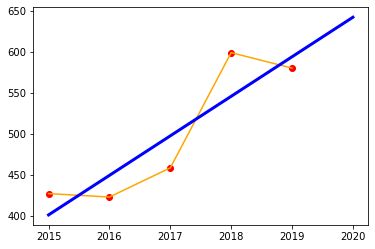

array([[642.29]])

In [111]:
x = np.array(df_avg.index).reshape(len(df_avg.index),1)
y = np.array(df_avg['Calls']).reshape(len(df_avg.index),1)
model = LR()
model.fit(x,y)

plt.scatter(x,y, color = 'red')
plt.plot(x,y, color = 'orange')
x = np.append(x, [2020]).reshape( len(df_avg.index)+1, 1)
plt.plot(x, model.predict(x), color = 'blue', lw = 3)
plt.show()

model.predict(np.array(2020).reshape(1,1))

In [104]:
df1 = pd.read_csv('data/udemy/data-5283-2021-06-17.csv', delimiter = ';')
df1_avg = df1.groupby('Year').mean()
df1_avg

,ID,global_id,Calls,Unnamed: 6
Year,,,,
2015,66.5,4.112174e+07,427.068182,NaN
2016,198.5,1.976907e+08,422.878788,NaN
2017,330.5,5.279323e+08,458.454545,NaN
2018,462.5,8.761135e+08,599.068182,NaN
2019,594.5,9.609900e+08,573.000000,NaN
2020,726.5,1.050538e+09,505.666667,NaN
2021,820.0,1.105451e+09,564.818182,NaN


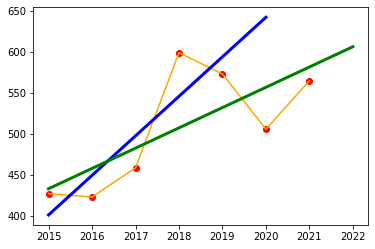

array([[606.33]])

In [118]:
x1 = np.array(df1_avg.index).reshape(len(df1_avg.index),1)
y1 = np.array(df1_avg['Calls']).reshape(len(df1_avg.index),1)
model1 = LR()
model1.fit(x1,y1)

plt.scatter(x1,y1, color = 'red')
plt.plot(x1,y1, color = 'orange')
x1 = np.append(x1, [2022]).reshape( len(df1_avg.index)+1, 1)
plt.plot(x, model.predict(x), color = 'blue', lw = 3)
plt.plot(x1, model1.predict(x1), color = 'green', lw = 3)
plt.show()

model1.predict(np.array(2022).reshape(1,1))

# Данные из интернета: HTTP запросы json и API

## Get-запрос к json-API

In [126]:
import requests
import json

In [127]:
# get-запрос к API ЦБ.рф
request = requests.get('https://www.cbr-xml-daily.ru/daily_json.js')
request

<Response [200]>

In [128]:
# json - это словарь словарей 
# ключ - строка
# значение - строка, число, словарь, список, массив

data = request.text
print(data)

{
    "Date": "2021-07-10T11:30:00+03:00",
    "PreviousDate": "2021-07-09T11:30:00+03:00",
    "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2021\/07\/09\/daily_json.js",
    "Timestamp": "2021-07-10T15:00:00+03:00",
    "Valute": {
        "AUD": {
            "ID": "R01010",
            "NumCode": "036",
            "CharCode": "AUD",
            "Nominal": 1,
            "Name": "Австралийский доллар",
            "Value": 55.3889,
            "Previous": 55.8776
        },
        "AZN": {
            "ID": "R01020A",
            "NumCode": "944",
            "CharCode": "AZN",
            "Nominal": 1,
            "Name": "Азербайджанский манат",
            "Value": 43.8302,
            "Previous": 44.2585
        },
        "GBP": {
            "ID": "R01035",
            "NumCode": "826",
            "CharCode": "GBP",
            "Nominal": 1,
            "Name": "Фунт стерлингов Соединенного королевства",
            "Value": 102.6386,
            "Previous": 103.6115
 

In [132]:
# конвертируем данные json-файла в датафрейм
df = pd.DataFrame(json.loads(request.text))
df

,Date,PreviousDate,PreviousURL,Timestamp,Valute
AMD,2021-07-10T11:30:00+03:00,2021-07-09T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2021/07/09/dail...,2021-07-10T15:00:00+03:00,"{'ID': 'R01060', 'NumCode': '051', 'CharCode':..."
AUD,2021-07-10T11:30:00+03:00,2021-07-09T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2021/07/09/dail...,2021-07-10T15:00:00+03:00,"{'ID': 'R01010', 'NumCode': '036', 'CharCode':..."
AZN,2021-07-10T11:30:00+03:00,2021-07-09T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2021/07/09/dail...,2021-07-10T15:00:00+03:00,"{'ID': 'R01020A', 'NumCode': '944', 'CharCode'..."
BGN,2021-07-10T11:30:00+03:00,2021-07-09T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2021/07/09/dail...,2021-07-10T15:00:00+03:00,"{'ID': 'R01100', 'NumCode': '975', 'CharCode':..."
BRL,2021-07-10T11:30:00+03:00,2021-07-09T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2021/07/09/dail...,2021-07-10T15:00:00+03:00,"{'ID': 'R01115', 'NumCode': '986', 'CharCode':..."
BYN,2021-07-10T11:30:00+03:00,2021-07-09T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2021/07/09/dail...,2021-07-10T15:00:00+03:00,"{'ID': 'R01090B', 'NumCode': '933', 'CharCode'..."
CAD,2021-07-10T11:30:00+03:00,2021-07-09T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2021/07/09/dail...,2021-07-10T15:00:00+03:00,"{'ID': 'R01350', 'NumCode': '124', 'CharCode':..."
CHF,2021-07-10T11:30:00+03:00,2021-07-09T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2021/07/09/dail...,2021-07-10T15:00:00+03:00,"{'ID': 'R01775', 'NumCode': '756', 'CharCode':..."
CNY,2021-07-10T11:30:00+03:00,2021-07-09T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2021/07/09/dail...,2021-07-10T15:00:00+03:00,"{'ID': 'R01375', 'NumCode': '156', 'CharCode':..."
CZK,2021-07-10T11:30:00+03:00,2021-07-09T11:30:00+03:00,//www.cbr-xml-daily.ru/archive/2021/07/09/dail...,2021-07-10T15:00:00+03:00,"{'ID': 'R01760', 'NumCode': '203', 'CharCode':..."


In [133]:
qgrid_widjet = qgrid.show_grid(df, show_toolbar = True)
qgrid_widjet

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [134]:
# конвертируем данные ключа 'Valute' из json-файла в датафрейм
df = pd.DataFrame(json.loads(request.text)['Valute'])
df

,AUD,AZN,GBP,AMD,BYN,BGN,BRL,HUF,HKD,DKK,...,TRY,TMT,UZS,UAH,CZK,SEK,CHF,ZAR,KRW,JPY
ID,R01010,R01020A,R01035,R01060,R01090B,R01100,R01115,R01135,R01200,R01215,...,R01700J,R01710A,R01717,R01720,R01760,R01770,R01775,R01810,R01815,R01820
NumCode,036,944,826,051,933,975,986,348,344,208,...,949,934,860,980,203,752,756,710,410,392
CharCode,AUD,AZN,GBP,AMD,BYN,BGN,BRL,HUF,HKD,DKK,...,TRY,TMT,UZS,UAH,CZK,SEK,CHF,ZAR,KRW,JPY
Nominal,1,1,1,100,1,1,1,100,10,1,...,10,1,10000,10,10,10,1,10,1000,100
Name,Австралийский доллар,Азербайджанский манат,Фунт стерлингов Соединенного королевства,Армянских драмов,Белорусский рубль,Болгарский лев,Бразильский реал,Венгерских форинтов,Гонконгских долларов,Датская крона,...,Турецких лир,Новый туркменский манат,Узбекских сумов,Украинских гривен,Чешских крон,Шведских крон,Швейцарский франк,Южноафриканских рэндов,Вон Республики Корея,Японских иен
Value,55.3889,43.8302,102.639,14.9488,28.9408,45.0799,14.1581,24.7647,95.8743,11.8552,...,85.798,21.3069,70.0491,27.2557,34.2159,86.5539,81.3497,52.1426,64.8765,67.6639
Previous,55.8776,44.2585,103.612,15.101,28.987,45.4132,14.3708,24.8038,96.7825,11.945,...,86.2271,21.5151,70.7717,27.5682,34.3977,87.1142,81.7339,52.1772,65.4654,68.462


In [146]:
df.index

Index(['ID', 'NumCode', 'CharCode', 'Nominal', 'Name', 'Value', 'Previous'], dtype='object')

In [144]:
dir(df)

['AMD',
 'AUD',
 'AZN',
 'BGN',
 'BRL',
 'BYN',
 'CAD',
 'CHF',
 'CNY',
 'CZK',
 'DKK',
 'EUR',
 'GBP',
 'HKD',
 'HUF',
 'INR',
 'JPY',
 'KGS',
 'KRW',
 'KZT',
 'MDL',
 'NOK',
 'PLN',
 'RON',
 'SEK',
 'SGD',
 'T',
 'TJS',
 'TMT',
 'TRY',
 'UAH',
 'USD',
 'UZS',
 'XDR',
 'ZAR',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itrued

In [138]:
df['USD']

ID              R01235
NumCode            840
CharCode           USD
Nominal              1
Name        Доллар США
Value          74.4675
Previous       75.1952
Name: USD, dtype: object

In [139]:
df['USD']['Value']

74.4675

In [140]:
df['USD']['Value']/df['USD']['Nominal']

74.4675

## HTTP запросы с параметрами

In [2]:
import requests
import json

In [147]:
import requests
import json
request_headers = {'Content-Type': 'application/json',
                   'Accept': 'application/json;charset=UTF-8'}
url = 'https://postprice.ru/engine/russia/api.php?from=105064&to=620000&mass=40&valuation=500&vat=1'
response = requests.get(url,headers = request_headers)
# обязательно проверяем код ответа. он должен быть равен 200
print('Код ответа:', response.status_code)

Код ответа: 200


In [154]:
resp_text = json.loads(response.text)
resp_text

{'code': 100,
 'locality_from': 'МОСКВА 64',
 'locality_to': 'ЕКАТЕРИНБУРГ',
 'city_from': '',
 'city_to': 'ЕКАТЕРИНБУРГ',
 'region_from': 'МОСКВА',
 'region_to': 'СВЕРДЛОВСКАЯ ОБЛАСТЬ',
 'simple_letter': 32.4,
 'reg_letter': 70.8,
 'val_letter': 159.6,
 'simple_parcel': 48,
 'reg_parcel': 86.4,
 'val_parcel': 168,
 'pkg': 291.34,
 'letter_reg_1class': 150,
 'letter_val_1class': 234,
 'reg_parcel1class': 198,
 'val_parcel1class': 264,
 'pkg_1class': 198,
 'pkg_val_1class': 216,
 'cod': 605}

In [155]:
print('Стоимость отправки:', resp_text['simple_letter'],'руб.')

Стоимость отправки: 32.4 руб.


## Работа с SOAP: XML-запросы

In [173]:
# работа с XML-данными
from zeep import Client
client = Client('http://www.dneonline.com/calculator.asmx?WSDL')
for service in client.wsdl.services.values():
    print('Сервис:', service.name)
    for port in service.ports.values():        
        for operation in port.binding._operations.values():
            print('Метод:',operation.name)
            print(' Параметр:',operation.input.signature())
            

Сервис: Calculator
Метод: Add
 Параметр: intA: xsd:int, intB: xsd:int
Метод: Subtract
 Параметр: intA: xsd:int, intB: xsd:int
Метод: Multiply
 Параметр: intA: xsd:int, intB: xsd:int
Метод: Divide
 Параметр: intA: xsd:int, intB: xsd:int
Метод: Add
 Параметр: intA: xsd:int, intB: xsd:int
Метод: Subtract
 Параметр: intA: xsd:int, intB: xsd:int
Метод: Multiply
 Параметр: intA: xsd:int, intB: xsd:int
Метод: Divide
 Параметр: intA: xsd:int, intB: xsd:int


In [171]:
result = client.service.Subtract(2,3)
print(result)

-1


## Получение неструктурированных данных из HTML

In [78]:
from bs4 import BeautifulSoup

In [95]:
with open('data/index.html','r') as f:
    contents = f.read()
    
print(contents)

п»ї<!DOCTYPE html>
<html>
    <head>
        <title>Header</title>
        <meta charset="utf-8">                   
    </head>
        
    <body>
        <h2>Operating systems</h2>
        
        <ul id="mylist" style="width:150px">
            <li>Solaris</li>
            <li>FreeBSD</li>
            <li>Debian</li>                      
            <li>NetBSD</li>           
            <li>Windows</li>         
        </ul>
        
        <p>
          FreeBSD is an advanced computer operating system used to
		  power modern servers, desktops, and embedded platforms.
        </p>
                
        <p>
          Debian is a Unix-like computer operating system that is 
		  composed entirely of free software.
        </p>        
        
    </body>    
</html>


In [96]:
# Создается объект BeautifulSoup. 
# Данные передаются конструктору. 
# Вторая опция 'lxml' уточняет объект парсинга.

soup = BeautifulSoup(contents, 'lxml') 
print(soup)

<html><body><p>п»ї<!DOCTYPE html>

</p>
<title>Header</title>
<meta charset="utf-8"/>
<h2>Operating systems</h2>
<ul id="mylist" style="width:150px">
<li>Solaris</li>
<li>FreeBSD</li>
<li>Debian</li>
<li>NetBSD</li>
<li>Windows</li>
</ul>
<p>
          FreeBSD is an advanced computer operating system used to
		  power modern servers, desktops, and embedded platforms.
        </p>
<p>
          Debian is a Unix-like computer operating system that is 
		  composed entirely of free software.
        </p>
</body></html>


In [87]:
print(soup.h2)
print(soup.head)
print(soup.li)
print("HTML: {0}, name: {1}, text: {2}".format(soup.h2, 
        soup.h2.name, soup.h2.text))

<h2>Operating systems</h2>
None
<li>Solaris</li>
HTML: <h2>Operating systems</h2>, name: h2, text: Operating systems


In [88]:
# Метод recursiveChildGenerator() позволяет 
# перебрать содержимое HTML-документа.

for child in soup.recursiveChildGenerator():        
        if child.name:            
            print(child.name)

html
body
p
title
meta
h2
ul
li
li
li
li
li
p
p


In [93]:
# При помощи атрибута children можно вывести 
# все дочерние теги.
root = soup.html
root_childs = [e.name for e in root.children]# if e.name is not None]
print(root_childs)

['body']


In [97]:
# При помощи атрибута descendants можно получить 
# список всех потомков (дочерних элементов всех уровней) 
# рассматриваемого тега.
root = soup.html
root_childs = [e.name for e in root.descendants if e.name is not None]
print(root_childs)

['body', 'p', 'title', 'meta', 'h2', 'ul', 'li', 'li', 'li', 'li', 'li', 'p', 'p']


In [ ]:
# https://habr.com/ru/post/544828/

In [180]:
#import sys
#!{sys.executable} -m pip install bs4


In [200]:
import requests
url = 'https://mignews.com/news/lenta/all/24' #сохраним наш URL в переменную:
page = requests.get(url) #отправим GET()-запрос на сайт и сохраним полученное в переменную 'page':
print(page.status_code) #Проверим подключение: Код вернул нам статус код '200', значит это, что мы успешно подключены и все в полном порядке.

200


In [201]:
# Теперь создадим два списка (позже я объясню для чего они нужны):
filteredNews = []
allNews = []

In [202]:
# Самое время воспользоваться BeautifulSoup4 и 
# скормить ему наш page, указав в кавычках как он нам 
# поможет 'html.parcer':
soup = BeautifulSoup(page.text, "html.parser")
soup


<!DOCTYPE html>

<html>
<head>
<!-- Код после открытия head -->
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-53QK45B');</script>
<!-- End Google Tag Manager -->
<script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.js" type="text/javascript"></script>
<script async="" src="https://stat.media/sm.js" type="text/javascript"></script>
<script async="" src="//static.smi2.net/static/jsapi/jsapi.v5.0.0-3.ru_RU.js" type="text/javascript"></script>
<script async="" src="https://stat.media/sm.js" type="text/javascript"></script>
<script async="" src="//jsn.24smi.net/5/2/2393.js" type="text/javascript"></script>
<script async="" charset="utf-8" src="//js.smi2.

In [208]:
# Теперь воспользуемся функцией поиска в BeautifulSoup4:
allNews = soup.findAll('a', class_ ='col-sm-3 pr-0 mb-1')
allNews

[]

## Получение табличных данных из HTML

In [3]:
import requests
from bs4 import BeautifulSoup


In [52]:
# загрузили HTML-код страницы URL
r = requests.get('https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html')
# формируем объект bs
html = BeautifulSoup(r.content)
data = []
table = html.find('table')
for tr in table.find_all('tr'):    
    #data.append([''.join((td.get_text()).split()) for td in tr.find_all('td')])
    data.append([td.get_text().replace(' ','') for td in tr.find_all('td')])
df = pd.DataFrame(data[1:], columns =['Год','Количество'])
df

,Год,Количество
0,1959,2796228
1,1960,2782353
2,1961,2662135
3,1962,2482539
4,1963,2331505
...,...,...
57,2016,1893256
58,2017,1689884
59,2018,1599316
60,2019,1484517


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Год         62 non-null     object
 1   Количество  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [53]:
# теперь мы можем преобразовать типы
# df['Год'] = df.Год.astype('int')
# df['Количество'] = df.Количество.astype('float')

# другой способ преобразования данных
df['Количество'] = df['Количество'].astype('int')

# переведем Год в индекс
df = df.set_index('Год')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1959 to 2020
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Количество  62 non-null     int32
dtypes: int32(1)
memory usage: 744.0+ bytes


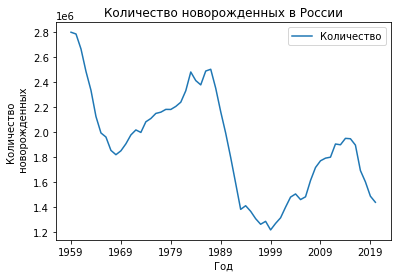

In [55]:
df.plot.line()
plt.xlabel('Год')
plt.ylabel('Количество \n новорожденных')
plt.title('Количество новорожденных в России');

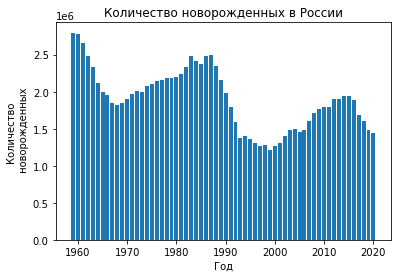

In [26]:
%matplotlib inline

#df['Количество'].plot.bar()


x = df['Год']
y = df['Количество']
plt.bar(x,y)
plt.xlabel('Год')
plt.ylabel('Количество \n новорожденных')
plt.title('Количество новорожденных в России');



## Смертность в России

In [38]:
# загрузили HTML-код страницы URL
r = requests.get('https://worldtable.info/gosudarstvo/smertnost-v-rossii-po-godam-tablica.html')
# формируем объект bs
html = BeautifulSoup(r.content)
data = []
table = html.find('table')
for tr in table.find_all('tr'):    
    #data.append([''.join((td.get_text()).split()) for td in tr.find_all('td')])
    data.append([td.get_text().replace(' ','') for td in tr.find_all('td')])
df = pd.DataFrame(data[1:], columns =['Год','Количество'])
df

,Год,Количество
0,1927,2705000
1,1928,2589000
2,1929,2819000
3,1930,2738000
4,1931,3090000
...,...,...
84,2016,1891015
85,2017,1824340
86,2018,1817710
87,2019,1800677


In [39]:
# теперь мы можем преобразовать типы
# df['Год'] = df.Год.astype('int')
# df['Количество'] = df.Количество.astype('float')

# другой способ преобразования данных
df['Количество'] = df['Количество'].astype('int')

# переведем Год в индекс
df = df.set_index('Год')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 1927 to 2020
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Количество  89 non-null     int32
dtypes: int32(1)
memory usage: 1.0+ KB


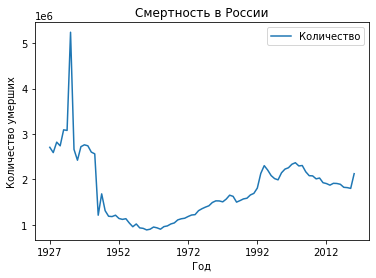

In [47]:
df.plot.line()
plt.xlabel('Год')
plt.ylabel('Количество умерших')
plt.title('Смертность в России');

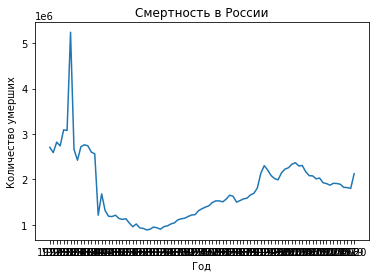

In [46]:
%matplotlib inline

#df['Количество'].plot.bar()



y = df['Количество']
plt.plot(y)
plt.xlabel('Год')
plt.ylabel('Количество умерших')
plt.title('Смертность в России');



## Численность населения России (РСФСР)

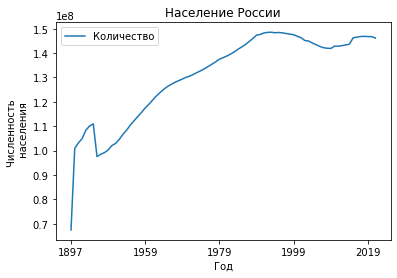

In [50]:
# загрузили HTML-код страницы URL
r = requests.get('https://worldtable.info/gosudarstvo/chislennost-naselenija-rossii-po-godam-v-odno.html')
# формируем объект bs
html = BeautifulSoup(r.content)
data = []
table = html.find('table')
for tr in table.find_all('tr'):    
    #data.append([''.join((td.get_text()).split()) for td in tr.find_all('td')])
    data.append([td.get_text().replace(' ','') for td in tr.find_all('td')])
df = pd.DataFrame(data[1:], columns =['Год','Количество'])

# теперь мы можем преобразовать типы
# df['Год'] = df.Год.astype('int')
# df['Количество'] = df.Количество.astype('float')

# другой способ преобразования данных
df['Количество'] = df['Количество'].astype('int')

# переведем Год в индекс
df = df.set_index('Год')

%matplotlib inline

#df['Количество'].plot.bar()



df.plot.line()
plt.xlabel('Год')
plt.ylabel('Численность \n населения')
plt.title('Население России');

# Обход сайта по страницам

In [61]:
#доноры -> страницы с данными
r = requests.get('https://www.kinopoisk.ru/top/lists/1/')
html = BeautifulSoup(r.content)
links = html.find_all('a')

def find_links (links, keyword):
    links_filtered = {}
    for link in links:
        if link.has_attr('href') and link['href'].find(keyword) > -1 and link['href'].find('/cast/') == -1:
            links_filtered[link['href']] = 1
    return list(links_filtered.keys())        

films = []
films.extend(find_links(html.find_all('a'),'/film/'))
pages = []
pages.extend(find_links(html.find_all('a'),'/page/'))

for page in pages:
    r = requests.get('https://www.kinopoisk.ru'+page)
    html = BeautifulSoup(r.content)
    films.extend(find_links(html.find_all('a'),'/film/'))

with open('data/udemy/films.txt','w') as f:
    f.write('\n'.join(films))

In [64]:
#import sys
#!{sys.executable} -m pip install multiprocess

In [65]:
from multiprocess import pool
from multiprocess import cpu_count
#https://www.kinopoisk.ru/film/111543/

In [76]:
r = requests.get('https://www.kinopoisk.ru/film/111543/')
html = BeautifulSoup(r.content)
title = html.find('span',{'class' : 'moviename-title-wrapper'}).get_text()
tags = html.find_all('td', {'class' : 'dollar'})
budget = ''
sales_www = ''

AttributeError: 'NoneType' object has no attribute 'get_text'

In [71]:
import sqlite3


In [74]:
conn = sqlite3.connect('SQlite/data.db3') # соединение с БД
db = conn.cursor()


films = db.execute("SELECT id, url FROM films WHERE title='' LIMIT 1").fetchall()
for film in films:
    headers = {"User-Agent" : "ittensive-python-scraper/1.0(+https://www.ittensive.com)"}
    r = request .get('https://www.kinopoisk.ru' + film[1], headers = headers)
    html = BeautifulSoup(r.connect)
    title = html.find('span',{'class': 'moviename-title-wrapper'}).get_text()
    tags = html.find_all('td',{'class' : 'dollar'})
    budget = 0
    sales_www = 0
    if len(tags) > 0:
        sales_www = tags[0].get_text()
        if len(tags) > 1:
            budget = tags[0].get_text()
            sales_www = tags[::-1][0].get_text()
    print(title, budget,sales_www)
db.close()
    

OperationalError: no such table: films